## Predicting Car Price

We will be predicting a Car Price based on various features of a car.

We will use various Machine Learning Models for this, and see properties of these models.
* Linear Regression
* Lasso Regression
* Ridge Regression
* Support Vector Machines
* Gradient Boosting Regression


In [2]:
import pandas as pd
import numpy as np

#### Load data and cleanup of data

In [3]:
auto_data = pd.read_csv('./data/imports-85.data',sep=r'\s*,\s*', engine='python',header=None)
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto_data.columns = headers
# data clean up by replace ? with nan
auto_data = auto_data.replace('?',np.nan)
# data type conversion
auto_data['price'] = pd.to_numeric(auto_data['price'], errors = 'coerce')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors = 'coerce')
cylinders_dict = {'two': 2, 'three':3, 'four':4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)
# drop columns that do not directly impact our prediction of vehicle price
auto_data = auto_data.drop('normalized-losses', axis=1)
# one hot encoding to convert text data into numeric
auto_data = pd.get_dummies(auto_data, columns = ['make', 'fuel-type','aspiration', 'num-of-doors','body-style','drive-wheels','engine-location', 'engine-type', 'fuel-system'])
# drop data that contains na
auto_data = auto_data.dropna()

#### Split Training and Test data

In [4]:
# now the data is cleaned-up, ready to be fed to ML algorithm
from sklearn.model_selection import train_test_split
#remove price column, as this is our label. This is going to be our prediction, so cannot be part of our training
# and needs to be cleaned up.
X = auto_data.drop('price', axis=1)
# set price as our prediction column
Y = auto_data['price']

# split 80-20 for training and test data
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

##### Linear Regression
Lets see R^2 for training data with Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_model.score(X_train, Y_train)

0.967922737092433

R^2 of 96.8% is good, as upper bound is 100%. Our model here fits 96.8% variance in training data.

Lets check the coefficients of various features

In [7]:
linear_feats = X_train.columns
linear_coef = pd.Series(linear_model.coef_, linear_feats).sort_values()
print(linear_coef)

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


So, as we can see above, cars of make Peugot, or cars with fuel type gas are inversely proportional to price (so Peugot, or gas fuel type cars are cheaper), and cars of make porche, saab, bmw are directly proportional to price (so cars with those features are expensive).

Now the model is trained, and can be used for prediction. Once we have prediction, we will plot the predicted value vs actual value ('price' column value, which we know already)

Populating the interactive namespace from numpy and matplotlib


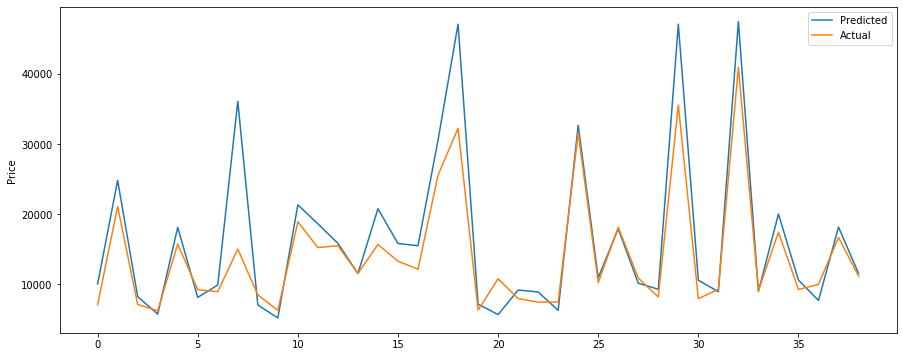

In [9]:
linear_y_predict = linear_model.predict(x_test)
%pylab inline
pylab.rcParams['figure.figsize']=(15,6)

plt.plot(linear_y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

Above we can see a chart with our Predicted and Actual values plotted on the graph.


Lets see the R^2 value (which is a measure of fit, value should be as close to 1 as possible, without overfit). And also check the MSE (Mean Square Error) and Standard Deviation of error in our predictions.

In [14]:
linear_test_r_square = linear_model.score(x_test,y_test)
print('R^2 for Test data :', linear_test_r_square)

from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(linear_y_predict, y_test)
print('Mean Square Error for Y prediction :', linear_model_mse )

import math
linear_std_dev = math.sqrt(linear_model_mse)
print('Standard Deviation of Predicted values vs Actual values :', linear_std_dev)

R^2 for Test data : 0.6322583416118098
Mean Square Error for Y prediction : 26099937.604333173
Standard Deviation of Predicted values vs Actual values : 5108.809803108075


So our predicted values with above Linear Regression model will be 5108.8 above/below the actual price

Lets write a method that will do this calculation for us using different models, and also generate charts

In [41]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import math
    
def process(model, model_name, hyperparam):
    model.fit(X_train,Y_train)
    r2_train_data = model.score(X_train, Y_train)
    
    print('R^2 for',model_name,'Model with',hyperparam,'hyper-parameter, on training data :', r2_train_data)

    y_predict = model.predict(x_test)
    %pylab inline
    pylab.rcParams['figure.figsize']=(15,6)

    plt.plot(y_predict, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel('Price')

    plt.legend()
    plt.show()

    r2_test_data = model.score(x_test,y_test)
    print('R^2 for Test data :', r2_test_data)


    mse = mean_squared_error(y_predict, y_test)
    print('Mean Square Error for Y prediction :', mse )

    std_dev = math.sqrt(mse)
    print('Standard Deviation of Predicted values vs Actual values :', std_dev)

#### Lasso Regression

Here we will use Regularization parameter alpha to tweek our model

R^2 for Lasso Model with 0.5 hyper-parameter, on training data : 0.965108127252755
Populating the interactive namespace from numpy and matplotlib


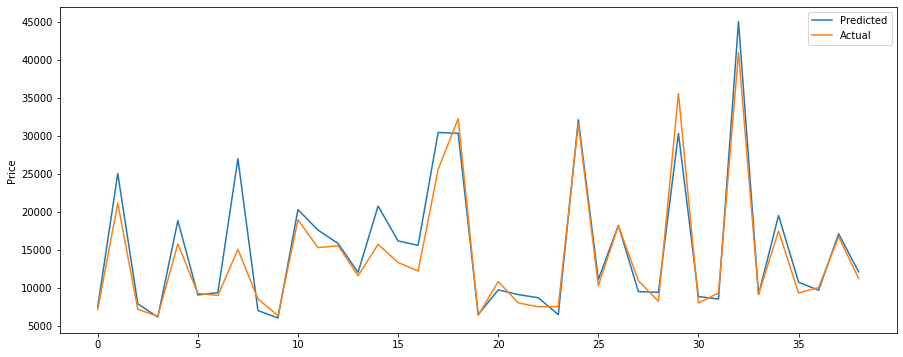

R^2 for Test data : 0.8871949534448477
Mean Square Error for Y prediction : 8006176.644353554
Standard Deviation of Predicted values vs Actual values : 2829.518800848221


In [32]:
process(Lasso(alpha=0.5, normalize=True), 'Lasso',0.5)

As we can see, though the R^2 value for training data is low, but R^2 for test data is higher compared to just LinearRegression. And you can see with Lasso Regression and alpha 0.5, our predictions only deviate by 2829 above/below the actual data of test dataset.

Lets now tweek alpha hyper parameter to 5 and see how it impacts R^2 values and Standard Deviation:


R^2 for Lasso Model with 5 hyper-parameter, on training data : 0.9499135446442243
Populating the interactive namespace from numpy and matplotlib


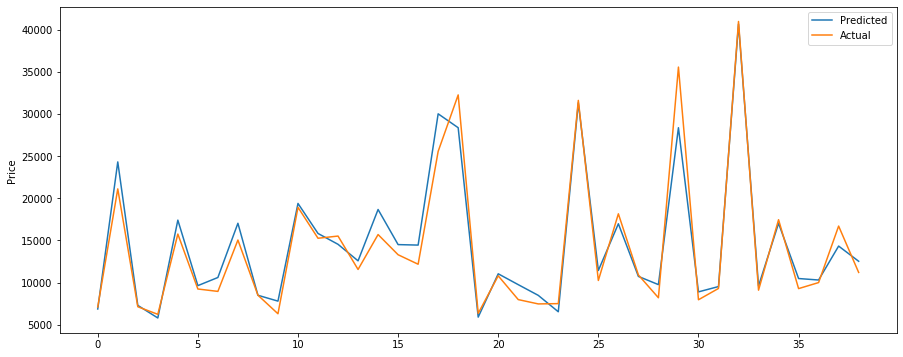

R^2 for Test data : 0.9465360953012363
Mean Square Error for Y prediction : 3794524.076597141
Standard Deviation of Predicted values vs Actual values : 1947.9538178809942


In [33]:
process(Lasso(alpha=5, normalize=True),'Lasso',5)

Here can see tweeking hyperparamter alpha from 0.5 to 5 has given better predictions on test dataset, and now our predictions are off by only 1947 compared to 2829 when alpha was 0.5

#### Ridge Regression

Lets try the same with Ridge Regression, and see predictions.

R^2 for Ridge Model with 0.05 hyper-parameter, on training data : 0.9538248035642568
Populating the interactive namespace from numpy and matplotlib


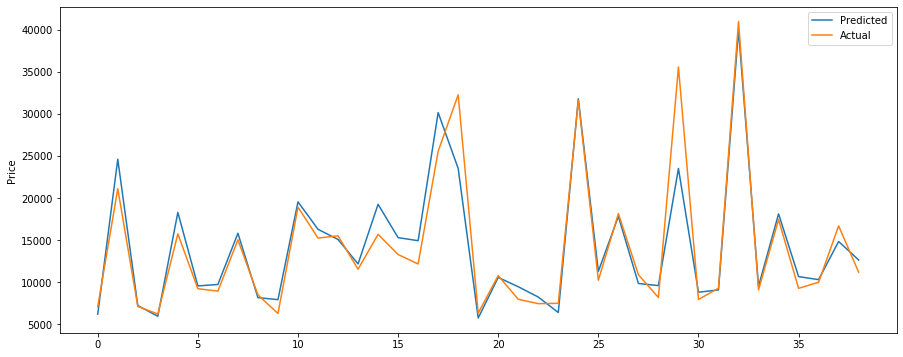

R^2 for Test data : 0.887566303416549
Mean Square Error for Y prediction : 7979820.611878877
Standard Deviation of Predicted values vs Actual values : 2824.8576268334086


In [34]:
process(Ridge(alpha=0.05, normalize=True),'Ridge',0.05)

R^2 for Ridge Model with 0.5 hyper-parameter, on training data : 0.9269306078889094
Populating the interactive namespace from numpy and matplotlib


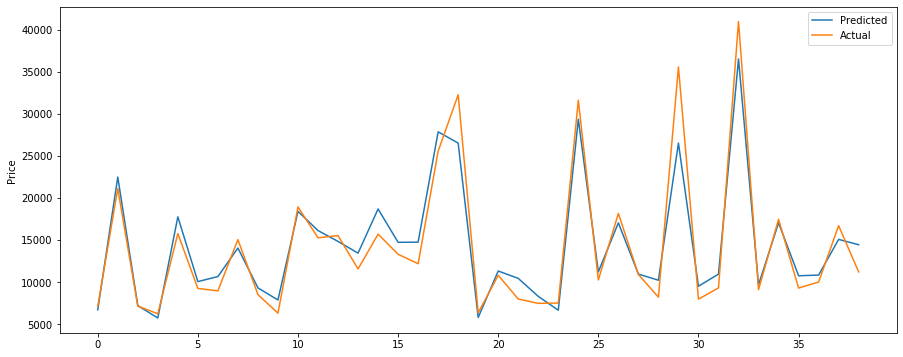

R^2 for Test data : 0.9215322460027146
Mean Square Error for Y prediction : 5569136.475474952
Standard Deviation of Predicted values vs Actual values : 2359.9017936081477


In [35]:
process(Ridge(alpha=0.5, normalize=True),'Ridge',0.5)

R^2 for Ridge Model with 1.0 hyper-parameter, on training data : 0.903583913207165
Populating the interactive namespace from numpy and matplotlib


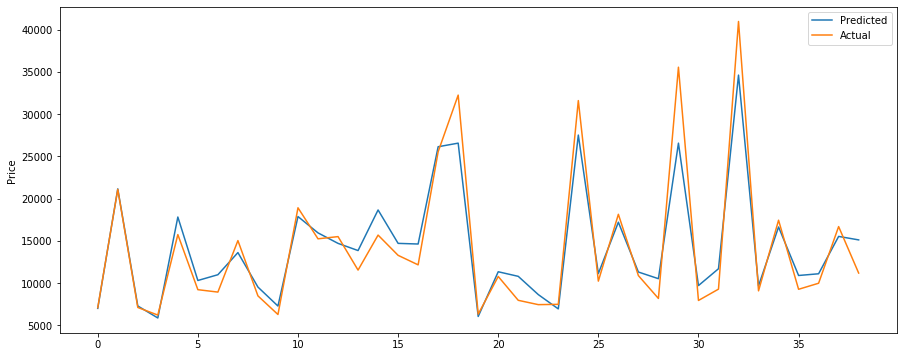

R^2 for Test data : 0.9072498752730311
Mean Square Error for Y prediction : 6582807.285903474
Standard Deviation of Predicted values vs Actual values : 2565.698206318014


In [36]:
process(Ridge(alpha=1.0, normalize=True),'Ridge',1.0)

As you can see with Ridge Regression, when changing alpha value from 0.05 to 0.5, we had better prediction (standard deviation reduced) but then changing it from 0.5 to 1.0 made the predictions worse (standard deviation increased)


There is no one size fits all, and we need to play around with different models and hyper parameter values to find the sweet spot that gives the best predictions.

#### Support Vector Regression

Lets see how Support Vector Regression performs and see how change in hyper parameter C, results in changes in prediction

R^2 for SVR Model with 1.0 hyper-parameter, on training data : 0.7601810603162245
Populating the interactive namespace from numpy and matplotlib


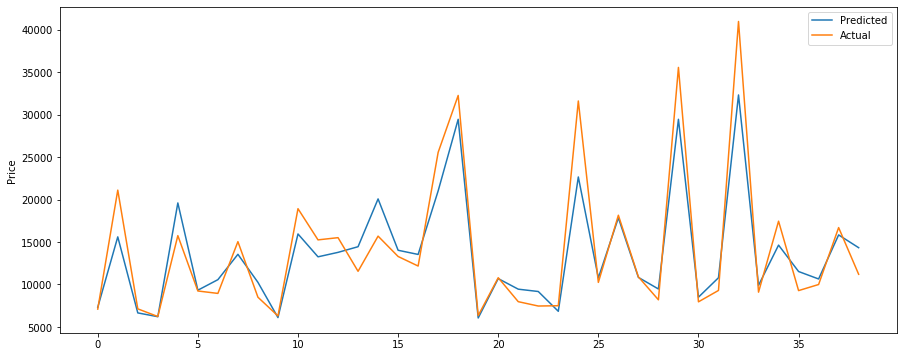

R^2 for Test data : 0.8719400287912358
Mean Square Error for Y prediction : 9088873.076852338
Standard Deviation of Predicted values vs Actual values : 3014.775792136513


In [37]:
from sklearn.svm import SVR
process(SVR(kernel='linear', C=1.0), 'SVR',1.0)

R^2 for SVR Model with 0.5 hyper-parameter, on training data : 0.758629839881765
Populating the interactive namespace from numpy and matplotlib


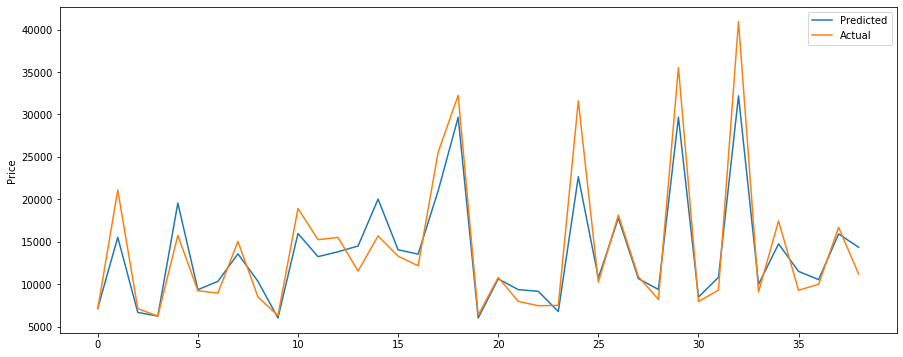

R^2 for Test data : 0.8731133382174618
Mean Square Error for Y prediction : 9005599.12048498
Standard Deviation of Predicted values vs Actual values : 3000.9330416530424


In [40]:
process(SVR(kernel='linear', C=0.5), 'SVR',0.5)

#### Gradient Boosting Regression

R^2 for Gradient Boosting Regressor Model with n_estimators:500 hyper-parameter, on training data : 0.9983862634096469
Populating the interactive namespace from numpy and matplotlib


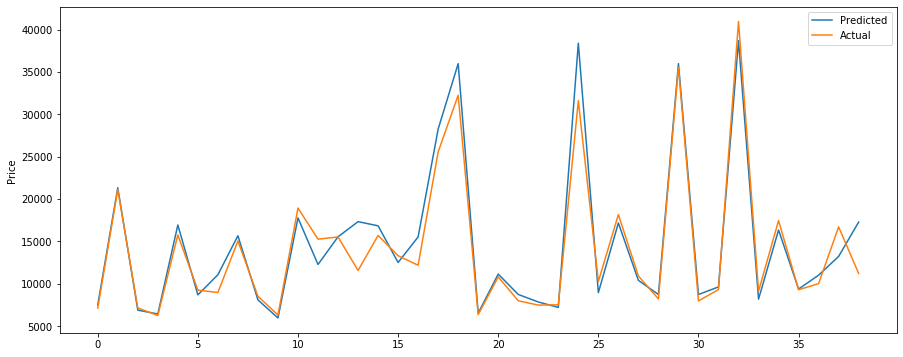

R^2 for Test data : 0.930161298435412
Mean Square Error for Y prediction : 4956701.835719817
Standard Deviation of Predicted values vs Actual values : 2226.365162258837


In [42]:
params = { 'n_estimators':500, 'max_depth': 6, 'min_samples_split':2, 'learning_rate' : 0.01,'loss':'ls'}
process(GradientBoostingRegressor(**params),'Gradient Boosting Regressor', 'n_estimators:500')

As we can see with Gradient Boosting Regressor, R^2 value is quite good for both training data and test data.